In [1]:
import urllib.parse
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MARKET_CODE_DICT = {
    'kospi' : 'stockMkt',
    'kosdaq' : 'kosdaqMkt',
    'konex' : 'konexMkt'
}

In [3]:
DOWNLOAD_URL = 'http://kind.krx.co.kr/corpgeneral/corpList.do'

In [4]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

In [5]:
def get_stock_codes(market=None, delisted=False):
    params = {'method':'download'}
    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+"market key is exist")
    else:
        print("invalid market")
    params_String = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL + "?" + params_String
    df = pd.read_html(request_url)[0]
    df['종목코드'] = df.종목코드.apply(zeroFill)
    return df

In [6]:
stocks = get_stock_codes('kospi')
stocks

kospimarket key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,092220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
803,현대코퍼레이션,011760,상품 종합 도매업,"자동차,철강,기계,선박,플랜트,컴퓨터,전자제품 수출,수출입대행/자원(탄광,유전) 개발",1977-12-01,12월,"정몽혁, 김원갑, 장안석(각자대표이사)",http://www.hyundaicorp.co.kr,서울특별시
804,현대코퍼레이션홀딩스,227840,음·식료품 및 담배 도매업,"브랜드사업, 육류유통",2015-10-23,12월,"정몽혁, 김원갑(각자대표이사)",http://www.hyundaicorpholdings.com,서울특별시
805,화신,010690,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조",1994-01-14,12월,"정서진, 장의호",http://www.hwashin.co.kr,경상북도
806,휴켐스,069260,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시


In [7]:
target = input()

 000540


In [8]:
seekCode = target

In [9]:
seekRow = stocks.loc[stocks.종목코드.str.upper() == seekCode.upper() ]

In [10]:
# seekRow

In [11]:
seekIndustry = seekRow.업종

In [12]:
# seekIndustry

In [13]:
seekIndustrys = seekIndustry.to_list()

In [14]:
seekRows = stocks.loc[(seekIndustrys[0] == stocks.업종.str.upper())]

In [15]:
seekRows

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
39,삼성화재해상보험,000810,보험업,"손해보험의 원수,재보험,운용자산의 투자활동",1975-06-30,12월,최영무,http://www.samsungfire.com,서울특별시
82,한화생명,088350,보험업,생명보험,2010-03-17,12월,여승주,http://www.hanwhalife.com,서울특별시
212,동양생명,082640,보험업,생명보험,2009-10-08,12월,"뤄젠룽(Luo, Jian Rong)",http://www.myangel.co.kr,서울특별시
440,삼성생명,032830,보험업,"생명보험,부동산 임대",2010-05-12,12월,전영묵,http://www.samsunglife.com,서울특별시
542,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
543,미래에셋생명,085620,보험업,생명보험상품,2015-07-08,12월,"변재상, 김평규",http://life.miraeasset.com,서울특별시
594,한화손해보험,000370,보험업,손해보험,1975-06-30,12월,강성수,http://www.hwgeneralins.com/,서울특별시
642,롯데손해보험,000400,보험업,손해보험업,1971-04-16,12월,이명재,http://www.lotteins.co.kr,서울특별시
702,현대해상,001450,보험업,손해보험(자동차보험),1989-08-25,12월,"조용일, 이성재",http://www.hi.co.kr,서울특별시
706,DB손해보험,005830,보험업,"자동차보험,화재보험,해상보험,특종보험,장기보험",1973-06-28,12월,김정남,http://www.idbins.com,서울특별시


In [16]:
seekLists = seekRows.종목코드.to_list()

In [17]:
seekLists

['000810',
 '088350',
 '082640',
 '032830',
 '000060',
 '085620',
 '000370',
 '000400',
 '001450',
 '005830',
 '000540']

In [18]:
df = fdr.DataReader(target)

In [19]:
class StockPosc:
    def __init__(self, stockCode,a, b, c):
        self.stockCode = stockCode
        self.df= fdr.DataReader(stockCode, '2020-01-01')
        self.a = a
        self.b = b
        self.c = c
        
    def get_poscSMA(self):
        df['sma10'] = self.df['Close'].rolling(10).mean()
        df['sma20'] = self.df['Close'].rolling(20).mean()
        poscSMA = ((df['sma10']-df['sma20'])/df['sma10'])*100
        return poscSMA 

    
    def weighted_mean(weight_array):
        def inner(x):
            return(weight_array*(x)).mean()
        return inner

    def get_poscWMA(self):
        weights = np.arange(1,11)
        df['wma10'] =self.df['Close'].rolling(10).apply(lambda prices:np.dot(prices, weights)/weights.sum(), raw=True)
        weights = np.arange(1,21)
        df['wma20'] = self.df['Close'].rolling(20).apply(lambda prices:np.dot(prices, weights)/weights.sum(), raw=True)
        poscWMA = ((df['wma10']-df['wma20'])/df['wma10'])*100
        return poscWMA

    def get_poscEMA(self):
        df['ema10'] = self.df['Close'].ewm(10).mean()
        df['ema20'] = self.df['Close'].ewm(20).mean()
        poscEMA = ((df['ema10']-df['ema20'])/df['ema10'])*100
        return poscEMA
    
    def get_posc(self):
        posc = ((self.get_poscSMA())*((self.a)/100) + (self.get_poscWMA())*((self.b)/100) + (self.get_poscEMA())*((self.c)/100))
        return posc  

In [20]:
SumStockPosc = 0
AvgSumStockPosc = 0
a=20 
b=30
c=50
for i in range(0, len(seekLists)):
    SumStockPosc += (StockPosc(seekLists[i],a,b,c).get_posc())
    AvgSumStockPosc = SumStockPosc / len(seekLists)

In [21]:
SumStockPosc

Date
1997-06-13          NaN
1997-06-14          NaN
1997-06-16          NaN
1997-06-17          NaN
1997-06-18          NaN
                ...    
2021-06-10    11.767279
2021-06-11    11.281367
2021-06-14    10.130420
2021-06-15     8.465898
2021-06-16     8.330561
Length: 6000, dtype: float64

In [22]:
# AvgSumStockPosc = SumStockPosc/len(seekLists)

In [23]:
AvgSumStockPosc

Date
1997-06-13         NaN
1997-06-14         NaN
1997-06-16         NaN
1997-06-17         NaN
1997-06-18         NaN
                ...   
2021-06-10    1.069753
2021-06-11    1.025579
2021-06-14    0.920947
2021-06-15    0.769627
2021-06-16    0.757324
Length: 6000, dtype: float64

In [24]:
targetStock=StockPosc(seekCode,a,b,c)

In [25]:
targetStock.get_posc()

Date
1997-06-13         NaN
1997-06-14         NaN
1997-06-16         NaN
1997-06-17         NaN
1997-06-18         NaN
                ...   
2021-06-10    1.663922
2021-06-11    1.662075
2021-06-14    1.503214
2021-06-15    1.282831
2021-06-16    1.217015
Length: 6000, dtype: float64

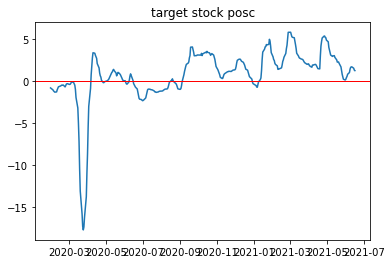

In [26]:
plt.plot(targetStock.get_posc())
plt.axhline(y=0, color='r', linewidth=1)
plt.title("target stock posc")
plt.show()

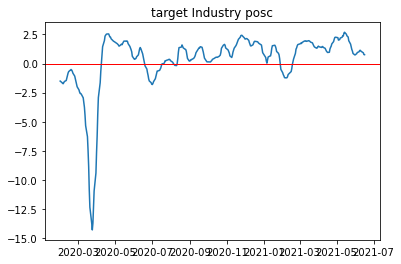

In [27]:
plt.plot(AvgSumStockPosc)
plt.axhline(y=0, color='r', linewidth=1)
plt.title("target Industry posc")
plt.show()

In [39]:
# plt.plot(AvgSumStockPosc-targetStock.get_posc())
# plt.axhline(y=0, color='r', linewidth=1)
# plt.show()
# # 평균이 더 높은곳에서 매수

Text(0.5, 1.0, 'target stock Close')

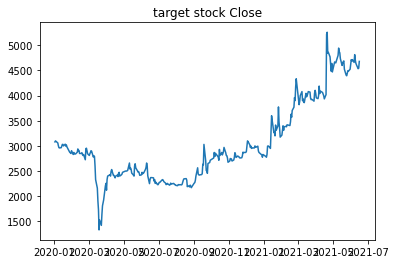

In [28]:
df = fdr.DataReader(target,'2020-01-01')
plt.plot(df.Close)
plt.title("target stock Close")

In [32]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

<AxesSubplot:xlabel='Date'>

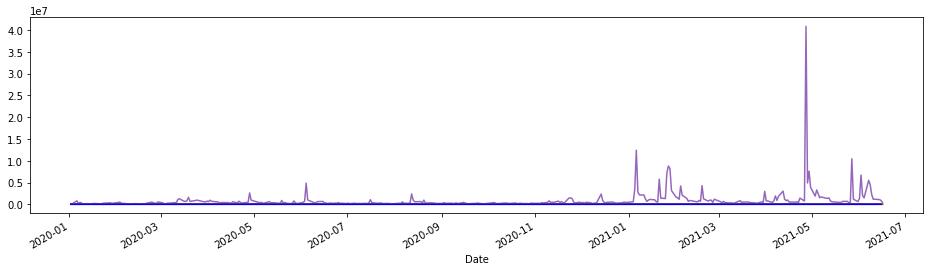

In [34]:
SEC = web.DataReader(seekCode, '2020-01-01', '2021-06-16')
plt.plot(SEC)
SEC["2020-01-01":"2021-06-15"]['Close'].plot(figsize=(16,4), style='b')

In [ ]:
plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family='AppleGothic')

In [ ]:
today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)

In [ ]:
SEC = web.DataReader("207940", startday, yesterday)
# print(type(SEC))
print(SEC.tail(10))
# SEC['Close'].plot(figsize=(16,4))
plt.subplot(211)
SEC["2020-01-01":"2020-03-31"]['Close'].plot(figsize=(16,4), style='b')
plt.subplot(212)
SEC["2020-01-01":"2020-03-31"]["Volume"].plot(figsize=(16,4), style='g')

plt.show()